In [13]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import ast 
import seaborn as sns

In [14]:
# Carregar o arquivo CSV para um DataFrame
df = pd.read_csv('melhores_resultados.csv')


df


,Nota,cromossomo
0,405,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,400,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,405,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,405,"[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, ..."
4,405,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
296,390,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
297,400,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
298,400,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
299,405,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
def variaveis(cromossomo, tam_subgrupo): # Quebra o cromossomo em subgrupos do tamanho de tam_subgrupo
    subgrupos = []
    valor = []
    for i in range(1, len(cromossomo)+1):
        valor.append(cromossomo[i-1]) 
        if i % tam_subgrupo == 0:
            subgrupos.append(valor)
            valor = []

    return subgrupos



In [16]:
def visualiza_roteamento(subgrupos):
    i = 1
    print('**************** MELHOR ROTEAMENTO ****************')
    for subgrupo in subgrupos:
        veiculo = []
        for indice, bit in enumerate(subgrupo):
            if indice != 0:
                if bit == 1:
                    veiculo.append(indice)
        # Convertendo cada elemento da lista para string e unindo-os com vírgulas
        resultado = ', '.join(map(str, veiculo))
        print(f'Veículo {i}: {resultado}')
        i+=1

Analisando o melhor indivíduo dentro do arquivo

In [17]:
# Encontrando o índice do menor valor na coluna 'Nota'
indice_valor_minimo = df['Nota'].idxmin()

# Coletando o valor da segunda coluna (Outra_coluna) na linha correspondente ao índice mínimo
cromossomo_minimo = df.iloc[indice_valor_minimo, 1]

# Converte a string de volta para uma lista de elementos
cromossomo_lista = ast.literal_eval(cromossomo_minimo)
len(cromossomo_lista)


64

In [18]:
print(f'Distância total: {df.iloc[indice_valor_minimo, 0]}')

Distância total: 365


In [19]:
visualiza_roteamento(variaveis(cromossomo_lista, 16))

**************** MELHOR ROTEAMENTO ****************
Veículo 1: 
Veículo 2: 3, 8, 10, 12, 14
Veículo 3: 5, 7, 9, 11, 13, 15
Veículo 4: 1, 2, 4, 6


Histograma com cores para frequências

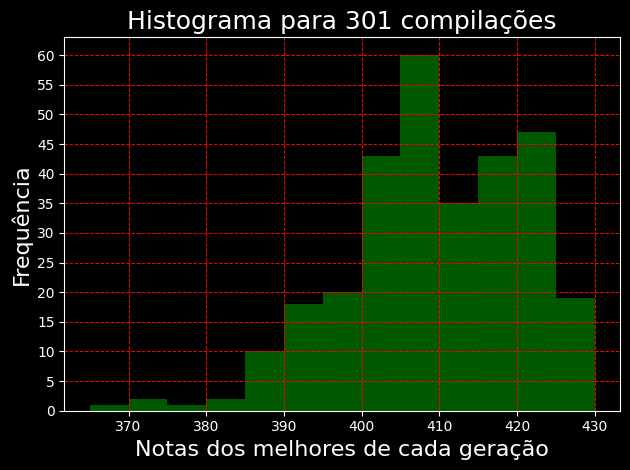

In [20]:
# Definir os limites dos bins com intervalo de 5
limites_bins = np.arange(min(df['Nota']), max(df['Nota']) + 5, 5)


plt.style.use('dark_background')


# Plotar o histograma
plt.hist(df['Nota'], bins=limites_bins, color='green', alpha=0.7, density=False)

# Obter os valores atuais do eixo y
_, y_values = plt.gca().get_ylim()  # Troquei a ordem para capturar y_values corretamente

# Definir o passo desejado para o eixo y
step = 5  # Ajuste o passo conforme necessário
plt.yticks(np.arange(0, y_values, step))

# Adicionar título, rótulos e grade ao gráfico
plt.title(f'Histograma para {len(df["Nota"])} compilações', fontsize=18)
plt.xlabel('Notas dos melhores de cada geração', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.grid(color='red', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

Histograma com cores para frequências

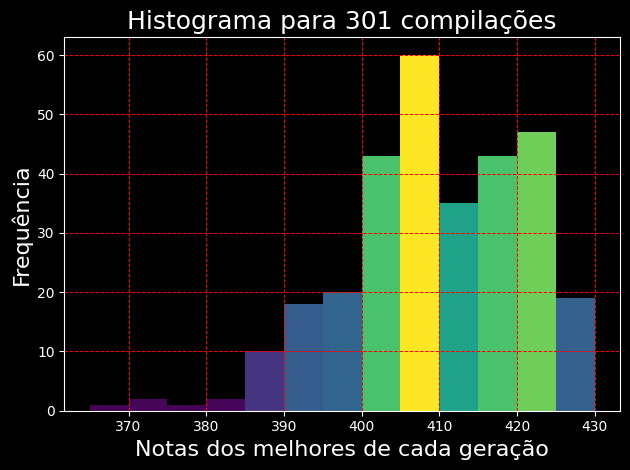

In [21]:
# Carregar o arquivo CSV para um DataFrame
df = pd.read_csv('melhores_resultados.csv')


fig, axs = plt.subplots(1, tight_layout=True)
# Definir os limites dos bins com intervalo de 5
limites_bins = np.arange(min(df['Nota']), max(df['Nota']) + 5, 5)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(df['Nota'], bins=limites_bins)

axs.grid(color='red', linestyle='--', linewidth=0.7)
axs.set_title(f'Histograma para {len(df["Nota"])} compilações', fontsize=18)
axs.set_xlabel('Notas dos melhores de cada geração', fontsize=16)
axs.set_ylabel('Frequência', fontsize=16)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

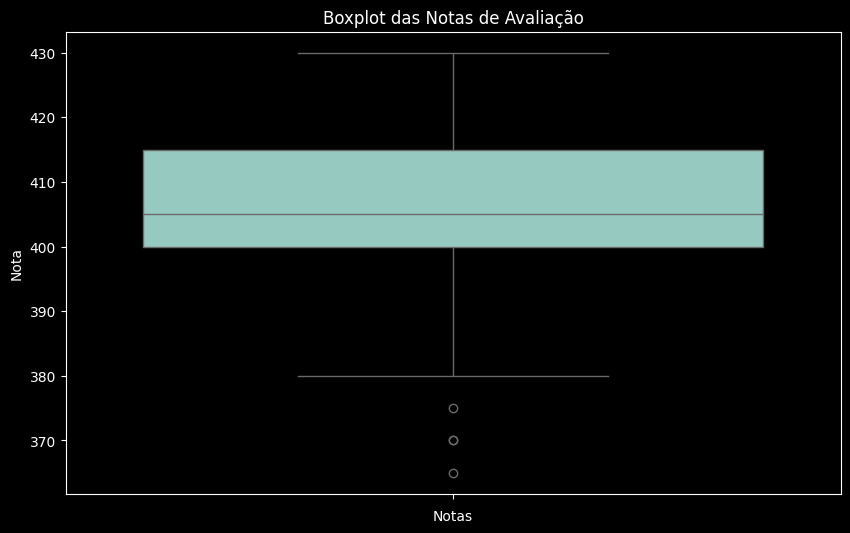

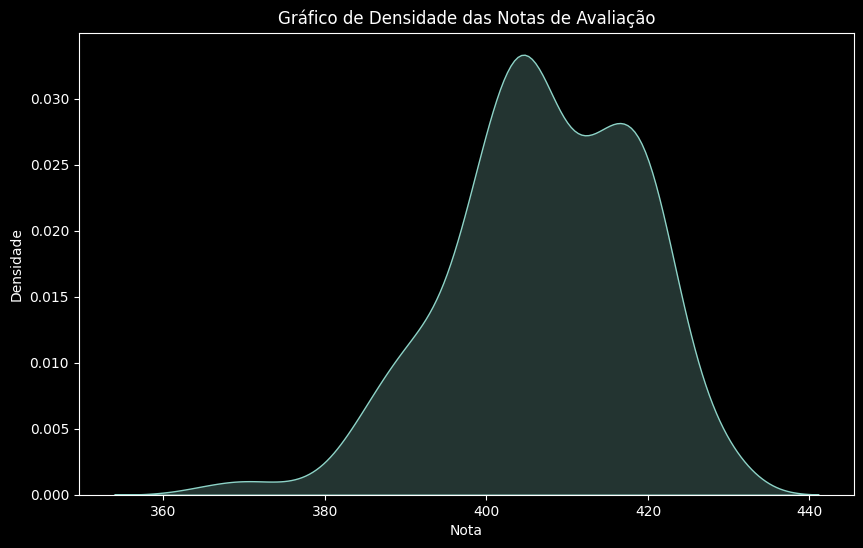

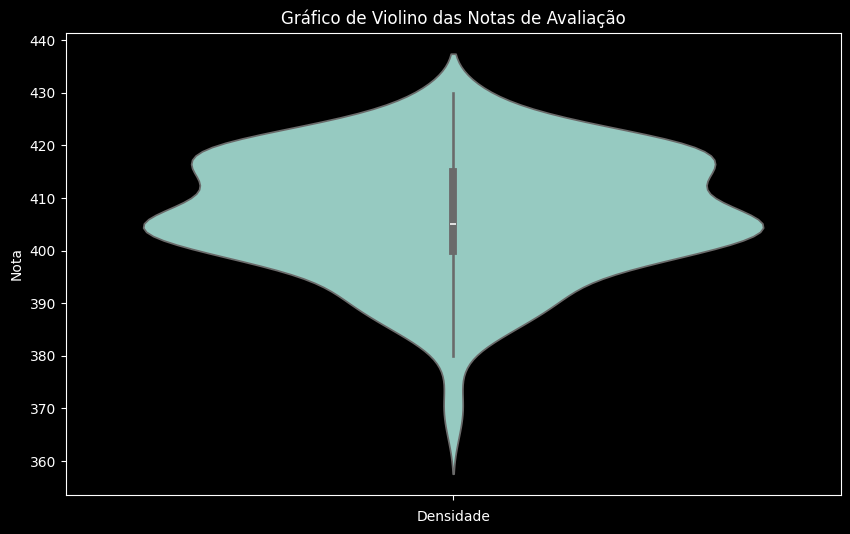

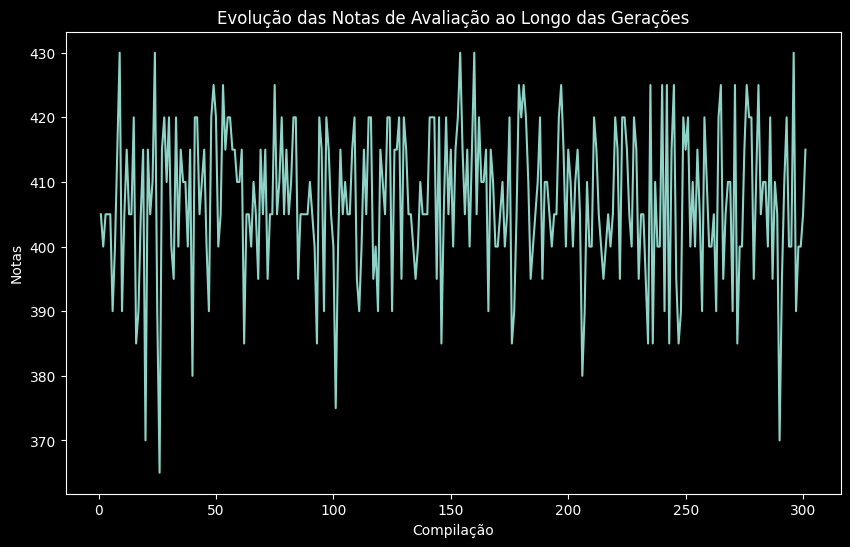

In [22]:
# 1. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Nota')
plt.title('Boxplot das Notas de Avaliação')
plt.xlabel('Notas')
plt.show()

# 2. Gráfico de Densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Nota', fill=True)
plt.title('Gráfico de Densidade das Notas de Avaliação')
plt.ylabel('Densidade')
plt.show()


# 5. Gráfico de Violino
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='Nota')
plt.title('Gráfico de Violino das Notas de Avaliação')
plt.xlabel('Densidade')
plt.show()

geracoes = []
for i in range(len(df['Nota'])):
    geracoes.append(i+1)

# 7. Gráfico de Linha - evolução das notas ao longo das gerações
plt.figure(figsize=(10, 6))
plt.plot(geracoes, df['Nota'])
plt.title('Evolução das Notas de Avaliação ao Longo das Gerações')
plt.xlabel('Compilação')
plt.ylabel('Notas')
plt.show()